In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


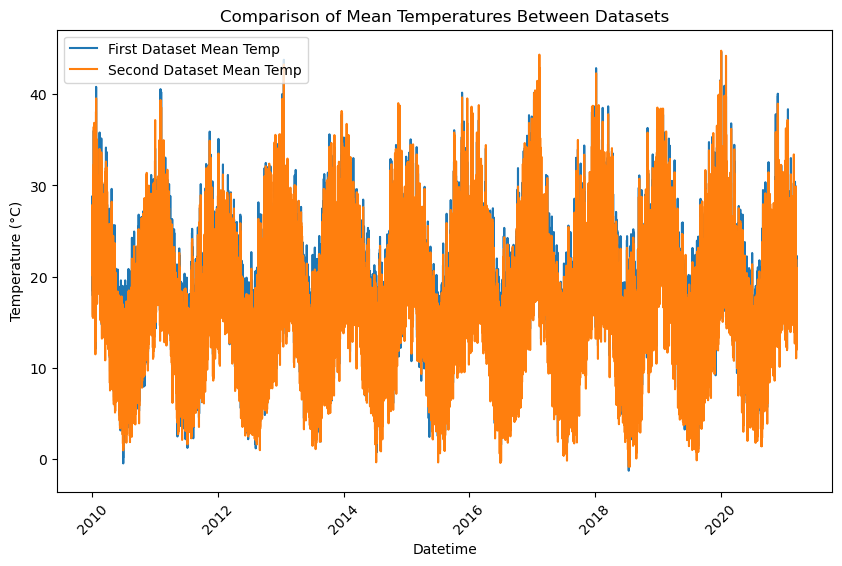

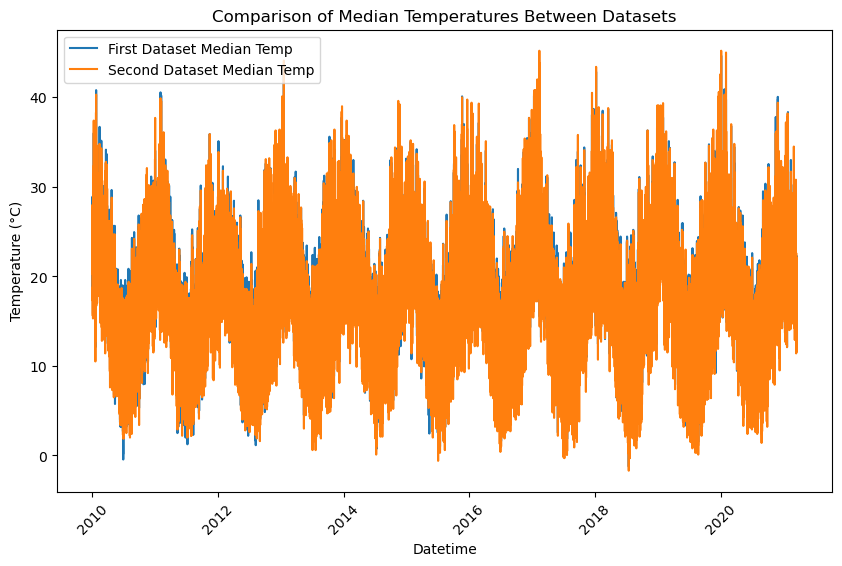


Summary statistics for first dataset:
         mean_temp1  median_temp1
count  98075.000000  98075.000000
mean      17.526472     17.525349
std        5.868027      5.868919
min       -1.250000     -1.250000
25%       13.450000     13.450000
50%       17.850000     17.850000
75%       21.500000     21.500000
max       44.650000     44.650000

Summary statistics for second dataset:
         mean_temp2  median_temp2
count  98007.000000  98007.000000
mean      16.508002     16.850447
std        6.322227      6.419563
min       -0.814286     -1.700000
25%       12.028571     12.300000
50%       16.471429     16.900000
75%       20.514286     21.000000
max       44.757143     45.200000


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first dataset
df_temp1 = pd.read_csv("../data/NSW/temperature_nsw.csv", names=["LOCATION", "DATETIME", "TEMPERATURE"], header=0)

# Load the second dataset
df_temp2 = pd.read_csv("../data/NSW/aggregated_temperature_data.csv", names=["Date", "Time", "mean_temp", "median_temp"], header=0)

# Convert the 'DATETIME' column in the first dataset to a datetime object
df_temp1['DATETIME'] = pd.to_datetime(df_temp1['DATETIME'], errors='coerce', format="%d/%m/%Y %H:%M")

# Combine 'Date' and 'Time' columns in the second dataset into a single 'datetime' column
df_temp2['datetime'] = pd.to_datetime(df_temp2['Date'] + ' ' + df_temp2['Time'], format="%d/%m/%Y %H:%M")

# Remove rows with invalid datetime values if any
df_temp1.dropna(subset=['DATETIME'], inplace=True)
df_temp2.dropna(subset=['datetime'], inplace=True)

# Aggregate the first dataset by hour (mean temperature per hour)
df_temp1_hourly = df_temp1.resample('H', on='DATETIME').agg({'TEMPERATURE': ['mean', 'median']}).reset_index()
df_temp1_hourly.columns = ['DATETIME', 'mean_temp1', 'median_temp1']

# Aggregate the second dataset by hour (mean and median temperature)
df_temp2_hourly = df_temp2.resample('H', on='datetime').agg({'mean_temp': 'mean', 'median_temp': 'median'}).reset_index()
df_temp2_hourly.columns = ['datetime', 'mean_temp2', 'median_temp2']

# Comparison: we will compare the two datasets by plotting their mean temperatures and median temperatures over time.

# Plotting mean temperature comparison
plt.figure(figsize=(10, 6))
plt.plot(df_temp1_hourly['DATETIME'], df_temp1_hourly['mean_temp1'], label="First Dataset Mean Temp")
plt.plot(df_temp2_hourly['datetime'], df_temp2_hourly['mean_temp2'], label="Second Dataset Mean Temp")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.title("Comparison of Mean Temperatures Between Datasets")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting median temperature comparison
plt.figure(figsize=(10, 6))
plt.plot(df_temp1_hourly['DATETIME'], df_temp1_hourly['median_temp1'], label="First Dataset Median Temp")
plt.plot(df_temp2_hourly['datetime'], df_temp2_hourly['median_temp2'], label="Second Dataset Median Temp")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.title("Comparison of Median Temperatures Between Datasets")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate summary statistics for both datasets
print("\nSummary statistics for first dataset:")
print(df_temp1_hourly[['mean_temp1', 'median_temp1']].describe())

print("\nSummary statistics for second dataset:")
print(df_temp2_hourly[['mean_temp2', 'median_temp2']].describe())



In [52]:
# Extract the year from the datetime column for both datasets
df_temp['year'] = df_temp['datetime'].dt.year
df_temp2['year'] = df_temp2['datetime'].dt.year


In [53]:
# Summary statistics for the first dataset
print("\nSummary statistics for first dataset:")
print(df_temp.describe())

# Summary statistics for the second dataset
print("\nSummary statistics for second dataset:")
print(df_temp2.describe())



Summary statistics for first dataset:
                            datetime           temp           year
count                         220326  220326.000000  220326.000000
mean   2015-08-16 07:59:12.964243712      17.418827    2015.130584
min              2010-01-01 00:00:00      -1.300000    2010.000000
25%              2012-11-02 23:07:30      13.400000    2012.000000
50%              2015-08-16 13:45:00      17.700000    2015.000000
75%              2018-06-03 14:22:30      21.300000    2018.000000
max              2021-03-18 00:00:00      44.700000    2021.000000
std                              NaN       5.849763       3.229999

Summary statistics for second dataset:
          mean_temp   median_temp             datetime          year
count  98007.000000  98007.000000                98280  98280.000000
mean      16.508002     16.850447  2015-08-10 12:30:00   2015.113665
min       -0.814286     -1.700000  2010-01-01 01:00:00   2010.000000
25%       12.028571     12.300000  2012-10

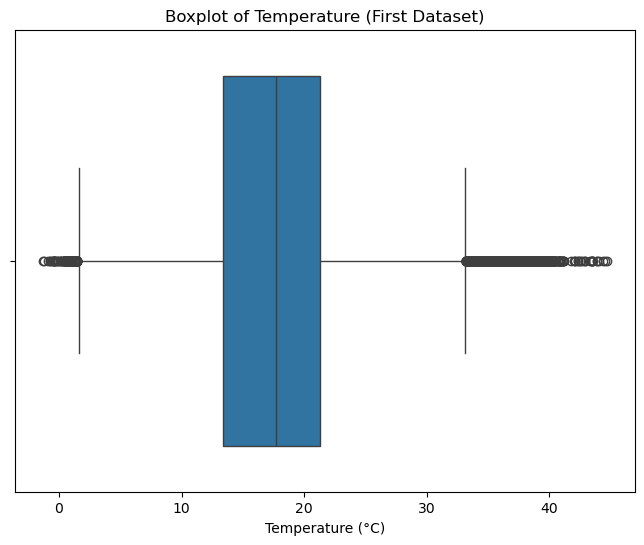

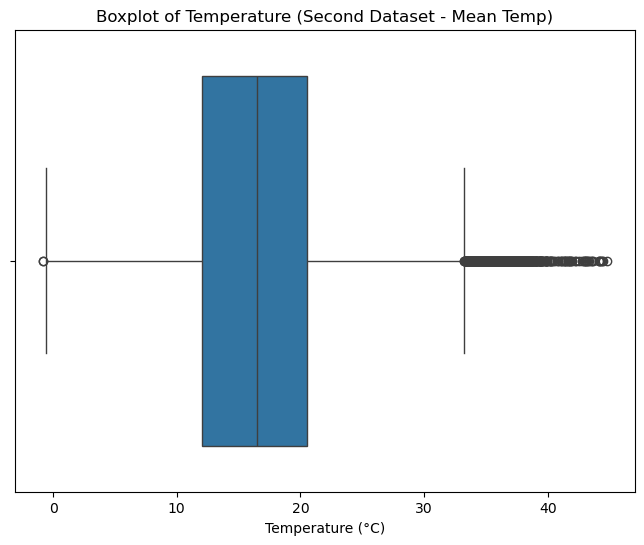

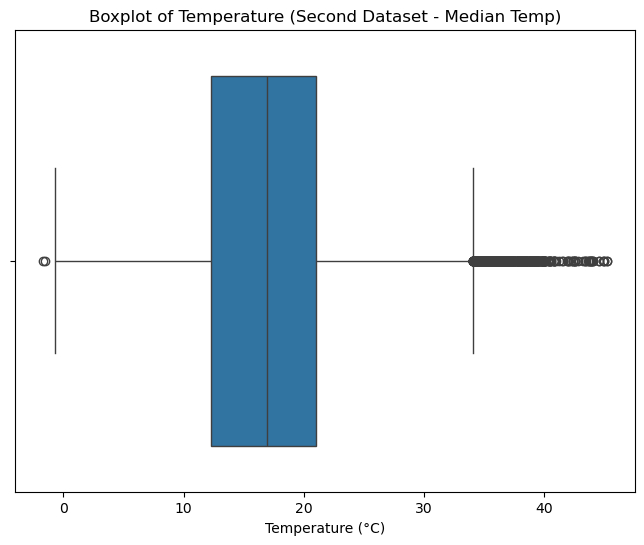

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the first dataset
df_temp1 = pd.read_csv("../data/NSW/temperature_nsw.csv", names=["LOCATION", "DATETIME", "TEMPERATURE"], header=0)

# Load the second dataset
df_temp2 = pd.read_csv("../data/NSW/aggregated_temperature_data.csv", names=["Date", "Time", "mean_temp", "median_temp"], header=0)

# Convert the 'DATETIME' column in the first dataset to a datetime object
df_temp1['DATETIME'] = pd.to_datetime(df_temp1['DATETIME'], errors='coerce', format="%d/%m/%Y %H:%M")

# Combine 'Date' and 'Time' columns in the second dataset into a single 'datetime' column
df_temp2['datetime'] = pd.to_datetime(df_temp2['Date'] + ' ' + df_temp2['Time'], format="%d/%m/%Y %H:%M")

# Remove rows with invalid datetime values if any
df_temp1.dropna(subset=['DATETIME'], inplace=True)
df_temp2.dropna(subset=['datetime'], inplace=True)

# Plot boxplot for the first dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp1, x="TEMPERATURE")
plt.title("Boxplot of Temperature (First Dataset)")
plt.xlabel("Temperature (°C)")
plt.show()

# Plot boxplot for the second dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp2, x="mean_temp")
plt.title("Boxplot of Temperature (Second Dataset - Mean Temp)")
plt.xlabel("Temperature (°C)")
plt.show()

# Optionally, you can also plot the median temperature for the second dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp2, x="median_temp")
plt.title("Boxplot of Temperature (Second Dataset - Median Temp)")
plt.xlabel("Temperature (°C)")
plt.show()

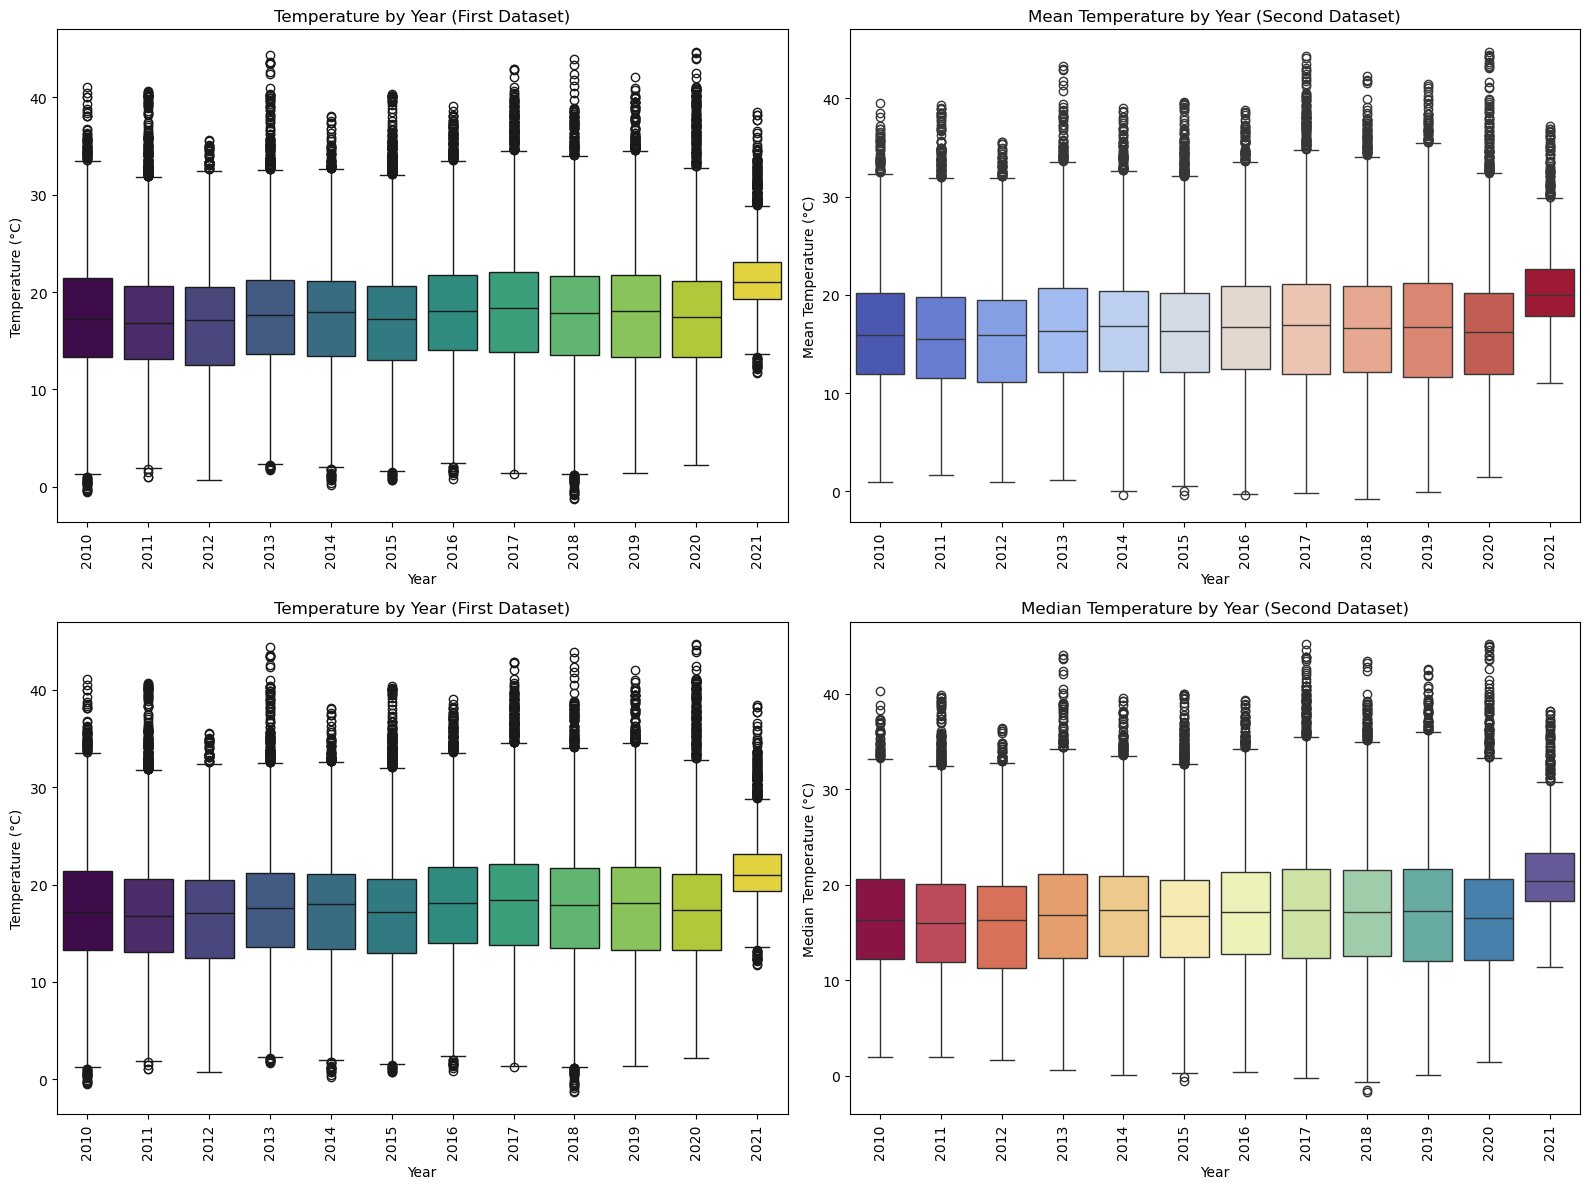

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_temp is the first dataset and df_temp2 is the second dataset

# Set up the figure and axes for side-by-side comparison of boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot for the First Dataset (df_temp) by year with colors
df_temp["year"] = df_temp["datetime"].dt.year
sns.boxplot(data=df_temp, x="year", y="temp", ax=axes[0, 0], hue="year", palette="viridis", dodge=False)
axes[0, 0].set_title("Temperature by Year (First Dataset)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Temperature (°C)")
axes[0, 0].legend_.remove()  # Remove the legend for cleaner display
for item in axes[0, 0].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the Mean Temperature by Year in the Second Dataset (df_temp2) with colors
df_temp2["year"] = df_temp2["datetime"].dt.year
sns.boxplot(data=df_temp2, x="year", y="mean_temp", ax=axes[0, 1], hue="year", palette="coolwarm", dodge=False)
axes[0, 1].set_title("Mean Temperature by Year (Second Dataset)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Mean Temperature (°C)")
axes[0, 1].legend_.remove()
for item in axes[0, 1].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the First Dataset (df_temp) by year again for comparison in the second row
sns.boxplot(data=df_temp, x="year", y="temp", ax=axes[1, 0], hue="year", palette="viridis", dodge=False)
axes[1, 0].set_title("Temperature by Year (First Dataset)")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Temperature (°C)")
axes[1, 0].legend_.remove()
for item in axes[1, 0].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the Median Temperature by Year in the Second Dataset (df_temp2) with colors
sns.boxplot(data=df_temp2, x="year", y="median_temp", ax=axes[1, 1], hue="year", palette="Spectral", dodge=False)
axes[1, 1].set_title("Median Temperature by Year (Second Dataset)")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Median Temperature (°C)")
axes[1, 1].legend_.remove()
for item in axes[1, 1].get_xticklabels():
    item.set_rotation(90)

# Adjust layout for better display
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

def process_rainfall_data(file_path):
    # Load the rainfall dataset
    df = pd.read_csv(file_path)

    # Convert Year, Month, Day to a DateTime object
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Filter data between 2010-01-01 and 2021-03-18
    mask = (df['Date'] >= '2010-01-01') & (df['Date'] <= '2021-03-18')
    df_filtered = df.loc[mask]

    # Ensure "Rainfall amount (millimetres)" is numeric and modify it in place
    df_filtered.loc[:, 'Rainfall amount (millimetres)'] = pd.to_numeric(df_filtered['Rainfall amount (millimetres)'], errors='coerce')

    return df_filtered

def calculate_median_rainfall(filtered_dfs):
    # Concatenate all dataframes and group by Date to calculate the median
    combined_df = pd.concat(filtered_dfs)
    median_rainfall = combined_df.groupby('Date')['Rainfall amount (millimetres)'].median().reset_index()

    return median_rainfall

# Paths to the rainfall data files
file_paths = [
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_069140_1800_Data.csv',
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_066006_1800_Data.csv',
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_066011_1800_Data.csv'
]

# Process each rainfall dataset
filtered_dfs = [process_rainfall_data(file_path) for file_path in file_paths]

# Calculate median rainfall for each date
median_rainfall = calculate_median_rainfall(filtered_dfs)

# Save the median rainfall to a CSV file
median_rainfall.to_csv('median_rainfall_2010_2021.csv', index=False)

print("Median rainfall data saved to 'median_rainfall_2010_2021.csv'.")


Median rainfall data saved to 'median_rainfall_2010_2021.csv'.


Missing values: Date                             0
Rainfall amount (millimetres)    0
dtype: int64
                      Date  Rainfall amount (millimetres)
count                 4095                    4095.000000
mean   2015-08-10 00:00:00                       3.097253
min    2010-01-01 00:00:00                       0.000000
25%    2012-10-20 12:00:00                       0.000000
50%    2015-08-10 00:00:00                       0.000000
75%    2018-05-29 12:00:00                       1.000000
max    2021-03-18 00:00:00                     187.000000
std                    NaN                      10.213883


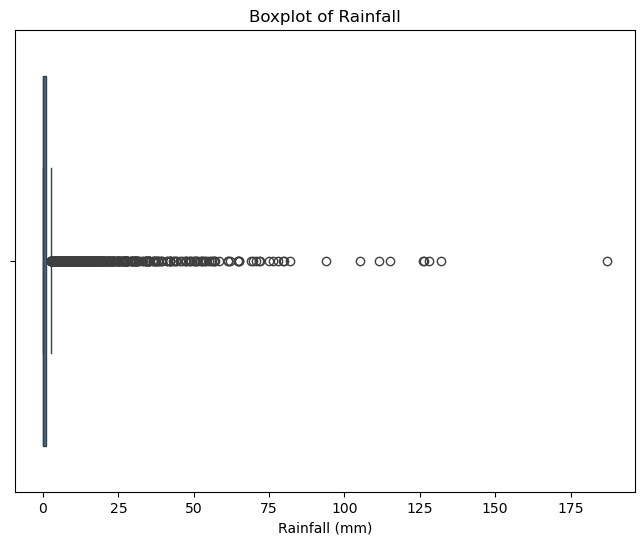

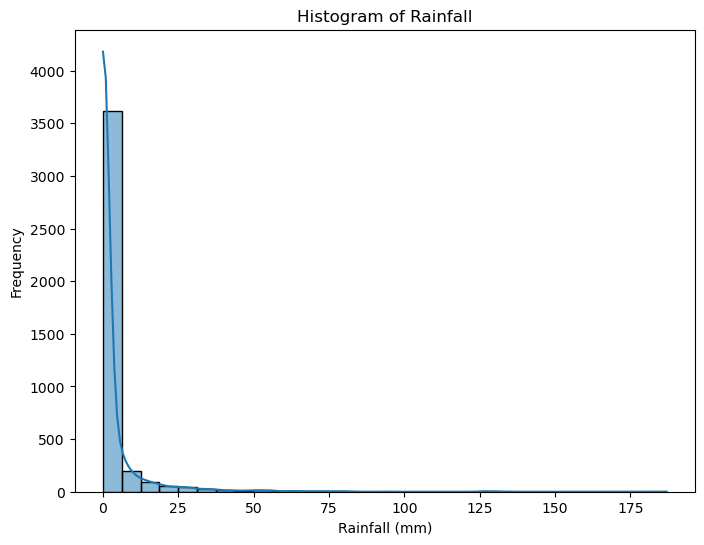

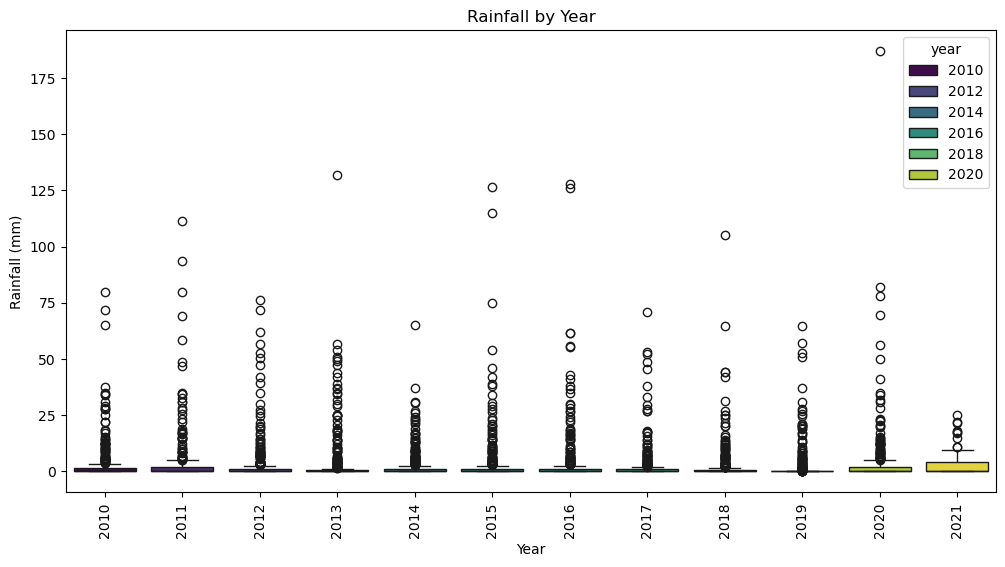

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the median rainfall data
df_rainfall = pd.read_csv('../data/NSW/median_rainfall_2010_2021.csv')

# Check for missing values
print("Missing values:", df_rainfall.isnull().sum())

# Convert 'Date' to a datetime object
df_rainfall["Date"] = pd.to_datetime(df_rainfall["Date"])

# Get summary statistics
summary_statistics = df_rainfall.describe()
print(summary_statistics)

# Plot a boxplot of rainfall
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_rainfall, x="Rainfall amount (millimetres)")
plt.title("Boxplot of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.show()

# Plot a histogram of rainfall
plt.figure(figsize=(8, 6))
sns.histplot(df_rainfall["Rainfall amount (millimetres)"], bins=30, kde=True)
plt.title("Histogram of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

# Extract the year from the 'Date' column
df_rainfall["year"] = df_rainfall["Date"].dt.year

# Plot rainfall by year
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_rainfall, x="year", y="Rainfall amount (millimetres)" ,hue="year", palette="viridis", dodge=False)
plt.title("Rainfall by Year")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()


Missing values: Date                0
Time                0
mean_humidity      47
median_humidity    47
dtype: int64
                                Date  mean_humidity  median_humidity
count                          98280   98233.000000     98233.000000
mean   2015-08-10 01:00:00.000000256      70.794520        70.397467
min              2010-01-01 00:00:00       7.566667         7.650000
25%              2012-10-20 00:00:00      56.380000        55.600000
50%              2015-08-10 00:00:00      74.116667        73.200000
75%              2018-05-30 00:00:00      87.683333        88.000000
max              2021-03-19 00:00:00     101.750000       101.900000
std                              NaN      19.698774        20.109217


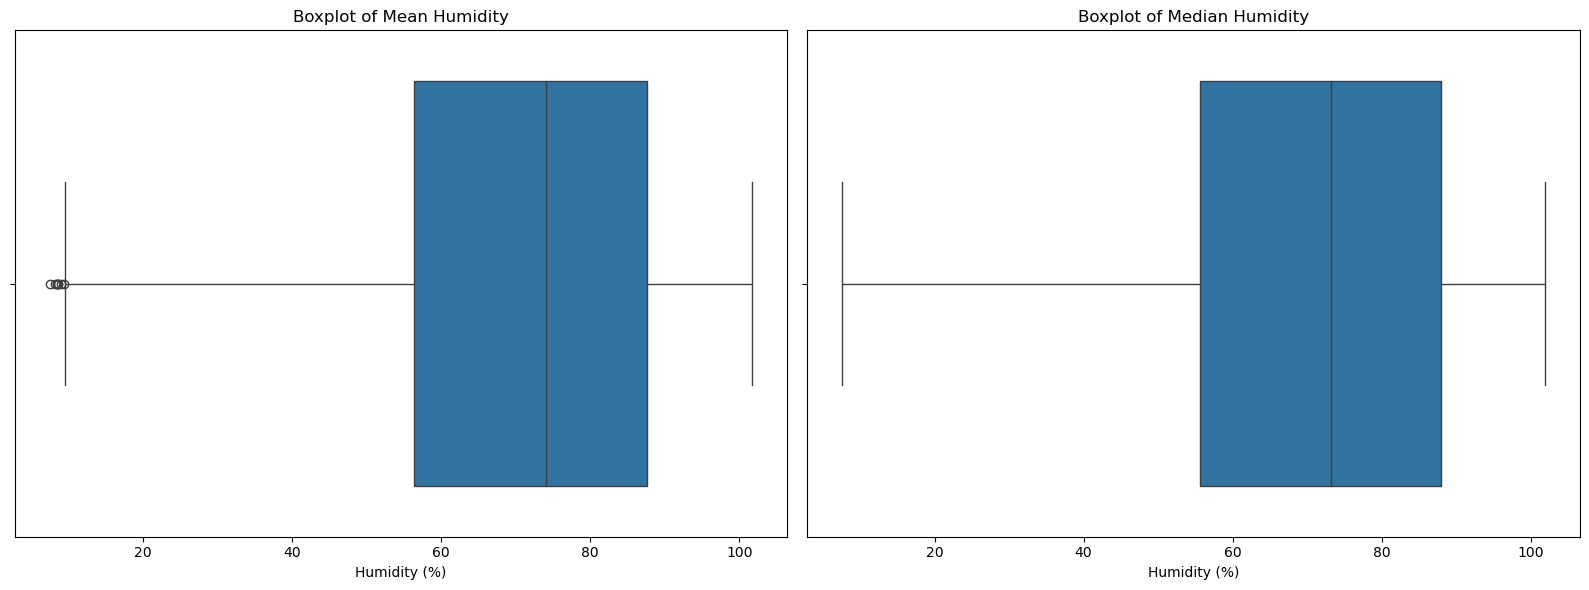

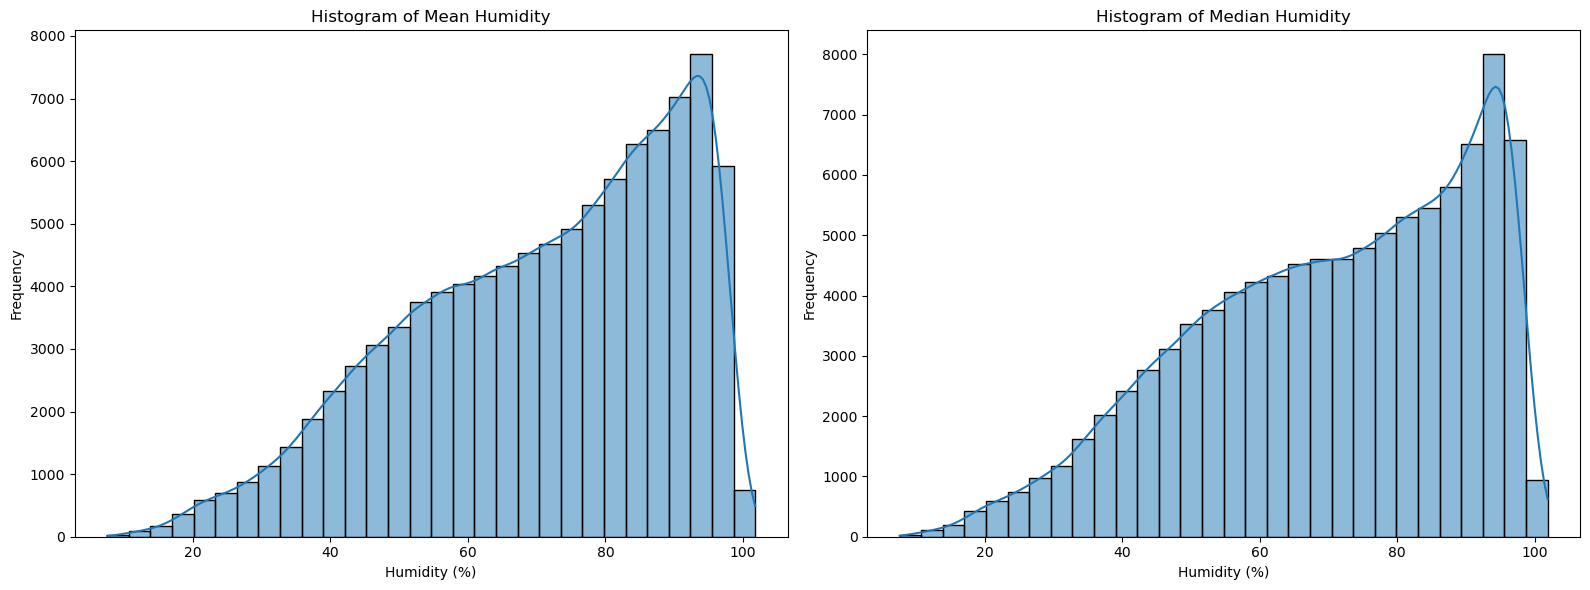

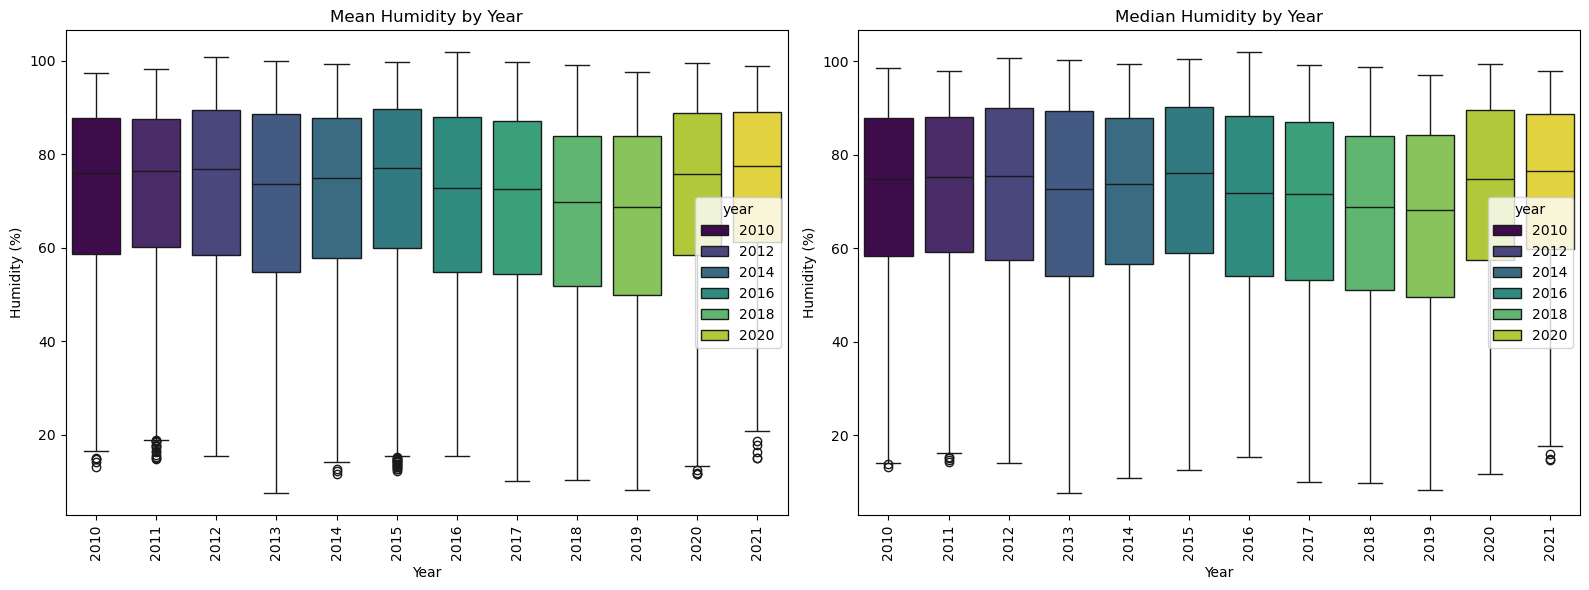

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the mean and median humidity data
df_humidity = pd.read_csv('../data/NSW/aggregated_humidity_data.csv')

# Check for missing values
print("Missing values:", df_humidity.isnull().sum())

# Convert 'Date' to a datetime object
df_humidity["Date"] = pd.to_datetime(df_humidity["Date"], format='%d/%m/%Y')

# Get summary statistics
summary_statistics = df_humidity.describe()
print(summary_statistics)

# Create subplots for boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean humidity
sns.boxplot(data=df_humidity, x="mean_humidity", ax=axes[0])
axes[0].set_title("Boxplot of Mean Humidity")
axes[0].set_xlabel("Humidity (%)")

# Boxplot of median humidity
sns.boxplot(data=df_humidity, x="median_humidity", ax=axes[1])
axes[1].set_title("Boxplot of Median Humidity")
axes[1].set_xlabel("Humidity (%)")

plt.tight_layout()
plt.show()

# Create subplots for histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of mean humidity
sns.histplot(df_humidity["mean_humidity"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Mean Humidity")
axes[0].set_xlabel("Humidity (%)")
axes[0].set_ylabel("Frequency")

# Histogram of median humidity
sns.histplot(df_humidity["median_humidity"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Median Humidity")
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Extract the year from the 'Date' column
df_humidity["year"] = df_humidity["Date"].dt.year

# Create subplots for mean and median humidity by year, side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean humidity by year
sns.boxplot(data=df_humidity, x="year", y="mean_humidity", ax=axes[0], hue="year", palette="viridis", dodge=False)
axes[0].set_title("Mean Humidity by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Humidity (%)")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot of median humidity by year
sns.boxplot(data=df_humidity, x="year", y="median_humidity", ax=axes[1], hue="year", palette="viridis", dodge=False)
axes[1].set_title("Median Humidity by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Humidity (%)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



Missing values: Date                0
Time                0
mean_windspeed      0
median_windspeed    0
dtype: int64
                                Date  mean_windspeed  median_windspeed
count                          98280    98280.000000      98280.000000
mean   2015-08-10 01:00:00.000000256        1.838959          1.838610
min              2010-01-01 00:00:00        0.160000          0.100000
25%              2012-10-20 00:00:00        0.957143          0.900000
50%              2015-08-10 00:00:00        1.500000          1.500000
75%              2018-05-30 00:00:00        2.420000          2.500000
max              2021-03-19 00:00:00        9.457143         10.000000
std                              NaN        1.191049          1.266361


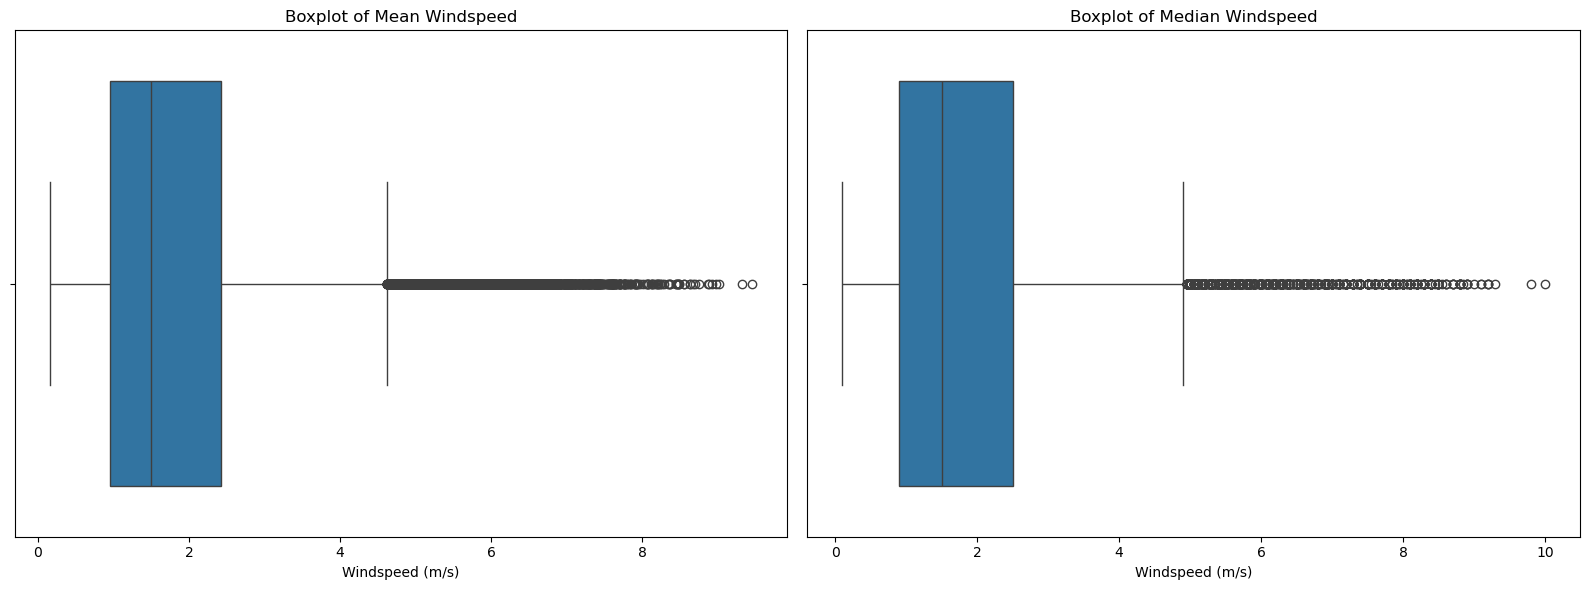

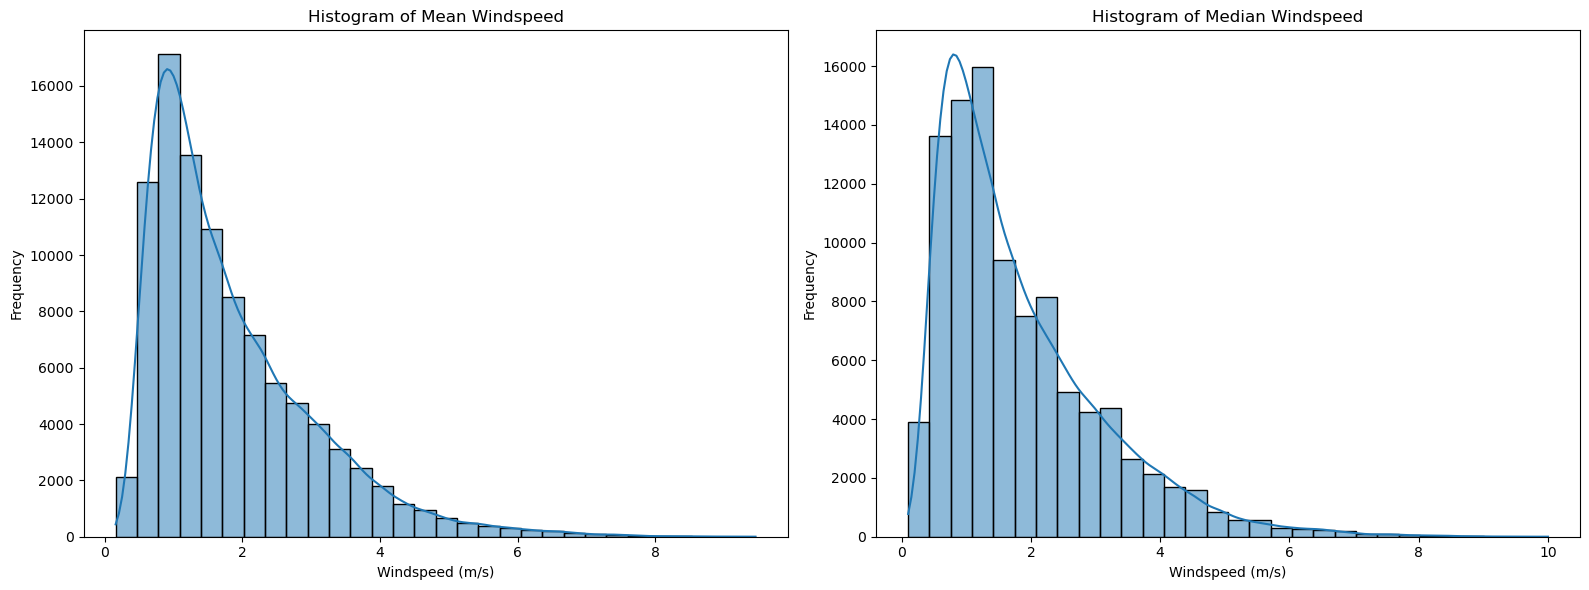

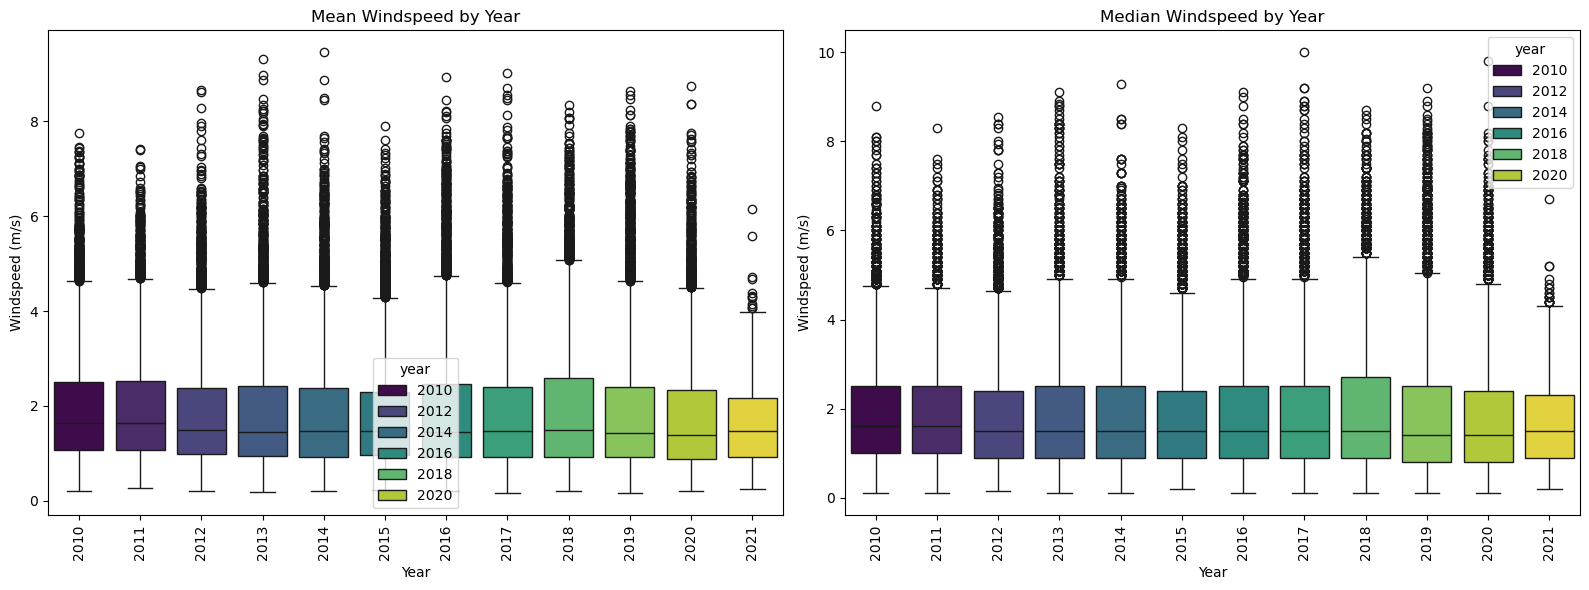

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mean and median windspeed data
df_windspeed = pd.read_csv('../data/NSW/aggregated_windspeed_data.csv')

# Check for missing values
print("Missing values:", df_windspeed.isnull().sum())

# Convert 'Date' to a datetime object
df_windspeed["Date"] = pd.to_datetime(df_windspeed["Date"], format='%d/%m/%Y')

# Get summary statistics
summary_statistics = df_windspeed.describe()
print(summary_statistics)

# Create subplots for boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean windspeed
sns.boxplot(data=df_windspeed, x="mean_windspeed", ax=axes[0])
axes[0].set_title("Boxplot of Mean Windspeed")
axes[0].set_xlabel("Windspeed (m/s)")

# Boxplot of median windspeed
sns.boxplot(data=df_windspeed, x="median_windspeed", ax=axes[1])
axes[1].set_title("Boxplot of Median Windspeed")
axes[1].set_xlabel("Windspeed (m/s)")

plt.tight_layout()
plt.show()

# Create subplots for histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of mean windspeed
sns.histplot(df_windspeed["mean_windspeed"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Mean Windspeed")
axes[0].set_xlabel("Windspeed (m/s)")
axes[0].set_ylabel("Frequency")

# Histogram of median windspeed
sns.histplot(df_windspeed["median_windspeed"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Median Windspeed")
axes[1].set_xlabel("Windspeed (m/s)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Extract the year from the 'Date' column
df_windspeed["year"] = df_windspeed["Date"].dt.year

# Create subplots for mean and median windspeed by year, side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean windspeed by year
sns.boxplot(data=df_windspeed, x="year", y="mean_windspeed", ax=axes[0], hue="year", palette="viridis", dodge=False)
axes[0].set_title("Mean Windspeed by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Windspeed (m/s)")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot of median windspeed by year
sns.boxplot(data=df_windspeed, x="year", y="median_windspeed", ax=axes[1], hue="year", palette="viridis", dodge=False)
axes[1].set_title("Median Windspeed by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Windspeed (m/s)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Missing values: Date                     0
Time                     0
mean_wind_direction      0
median_wind_direction    0
dtype: int64
                                Date  mean_wind_direction  \
count                          98280         98280.000000   
mean   2015-08-10 01:00:00.000000256           184.553390   
min              2010-01-01 00:00:00             4.416667   
25%              2012-10-20 00:00:00           138.400000   
50%              2015-08-10 00:00:00           201.850000   
75%              2018-05-30 00:00:00           231.533333   
max              2021-03-19 00:00:00           354.640000   
std                              NaN            66.486613   

       median_wind_direction  
count           98280.000000  
mean              185.531873  
min                 2.300000  
25%               130.600000  
50%               208.100000  
75%               237.250000  
max               358.900000  
std                76.408482  


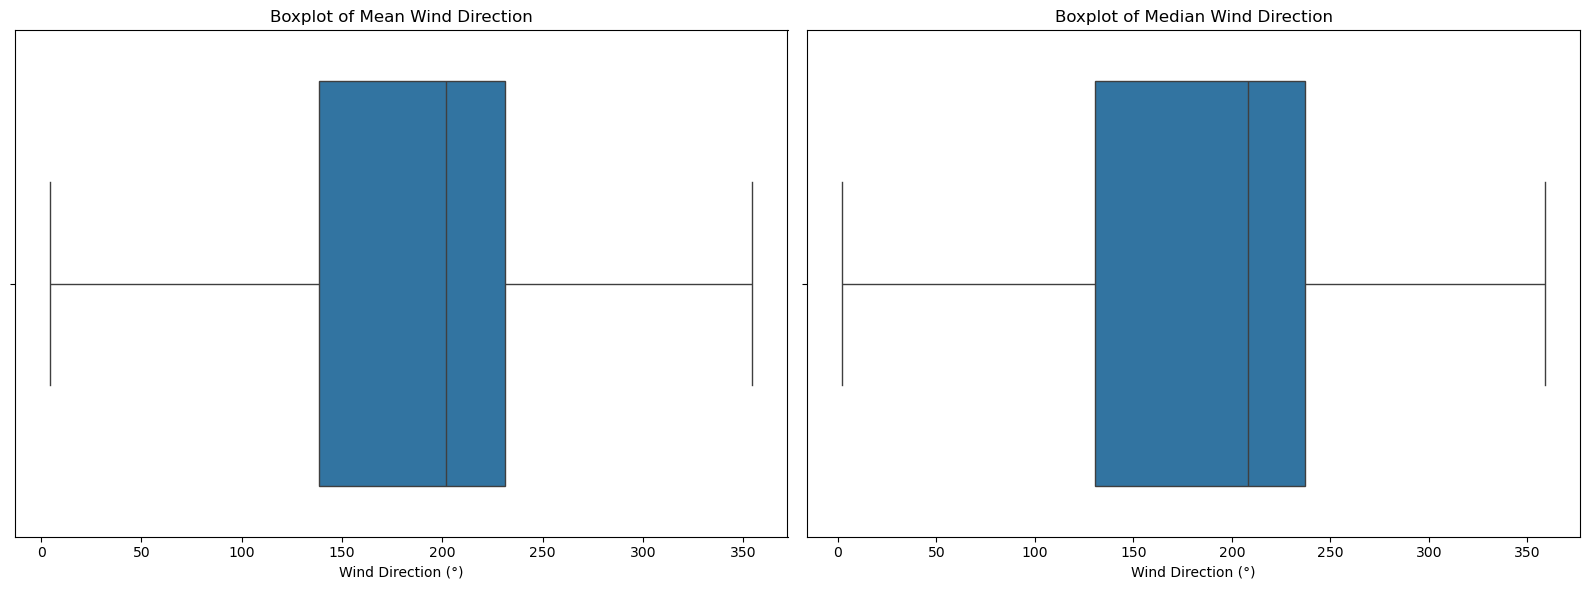

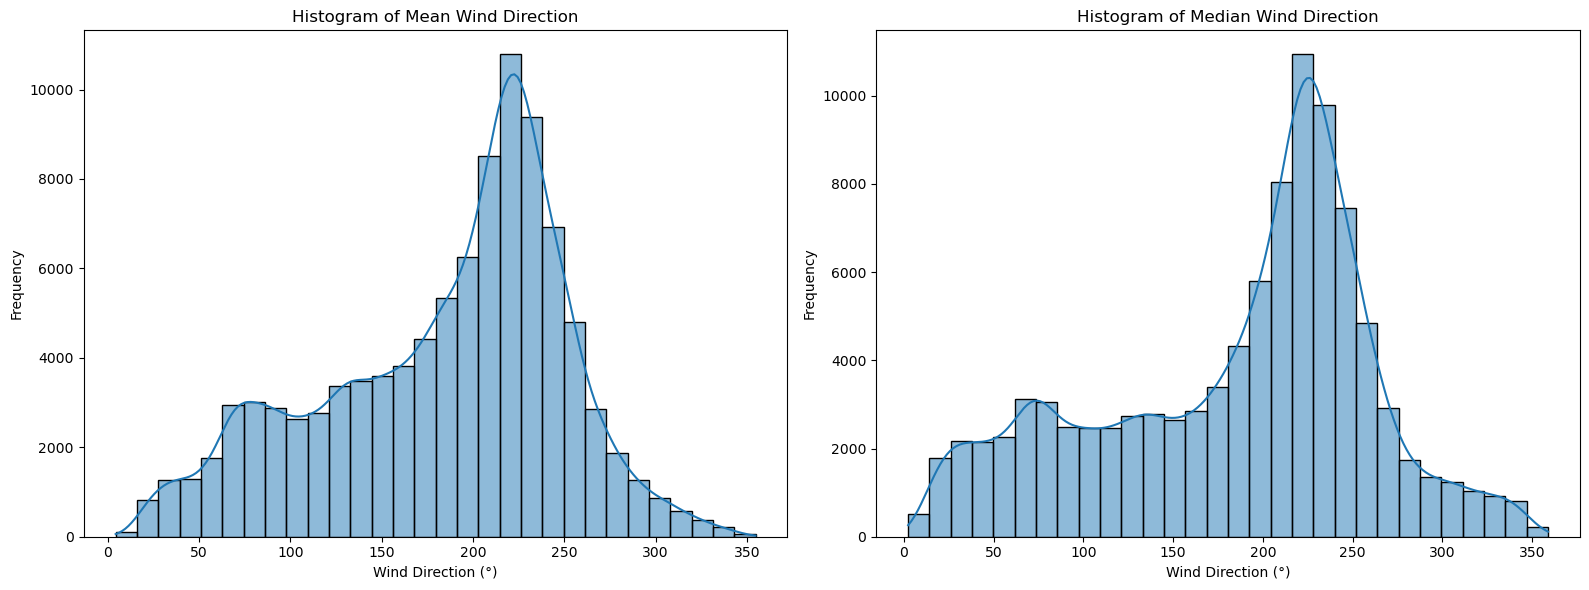

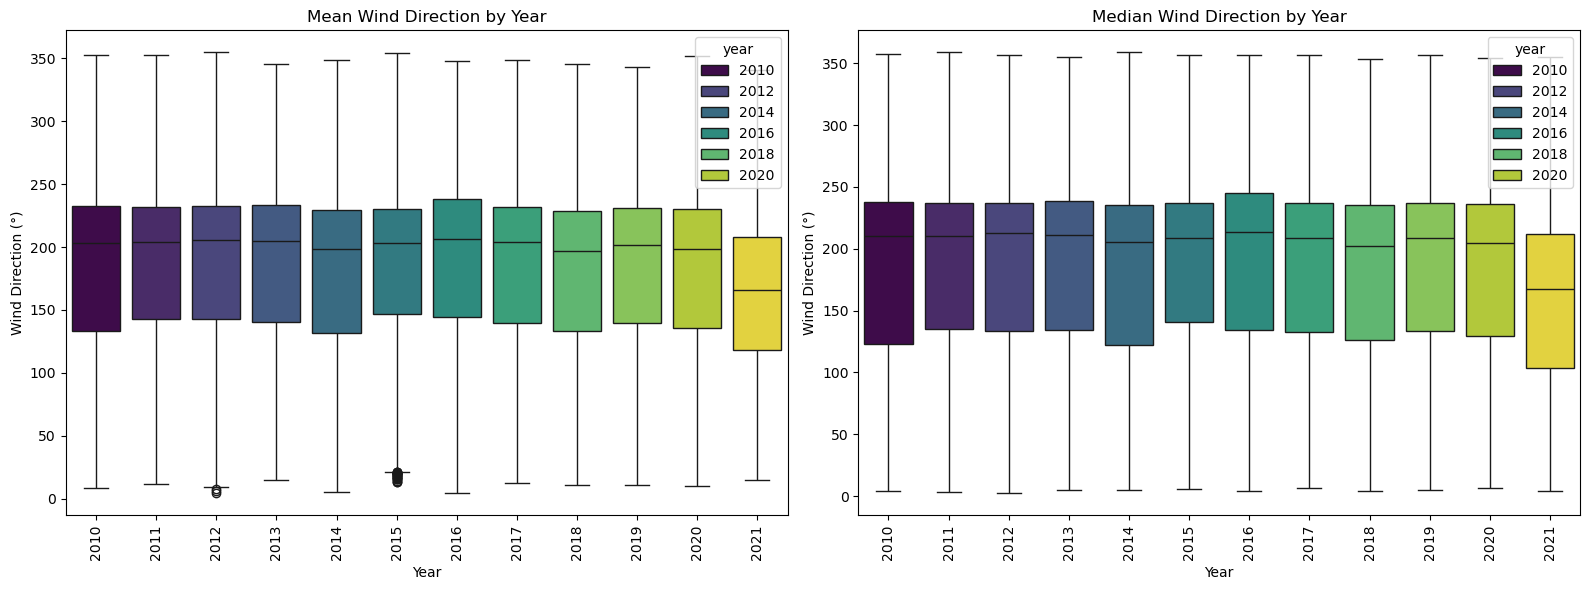

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mean and median wind direction data
df_wind_direction = pd.read_csv('../data/NSW/aggregated_wind_direction_data.csv')

# Check for missing values
print("Missing values:", df_wind_direction.isnull().sum())

# Convert 'Date' to a datetime object
df_wind_direction["Date"] = pd.to_datetime(df_wind_direction["Date"], format='%d/%m/%Y')

# Get summary statistics
summary_statistics = df_wind_direction.describe()
print(summary_statistics)

# Create subplots for boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean wind direction
sns.boxplot(data=df_wind_direction, x="mean_wind_direction", ax=axes[0])
axes[0].set_title("Boxplot of Mean Wind Direction")
axes[0].set_xlabel("Wind Direction (°)")

# Boxplot of median wind direction
sns.boxplot(data=df_wind_direction, x="median_wind_direction", ax=axes[1])
axes[1].set_title("Boxplot of Median Wind Direction")
axes[1].set_xlabel("Wind Direction (°)")

plt.tight_layout()
plt.show()

# Create subplots for histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of mean wind direction
sns.histplot(df_wind_direction["mean_wind_direction"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Mean Wind Direction")
axes[0].set_xlabel("Wind Direction (°)")
axes[0].set_ylabel("Frequency")

# Histogram of median wind direction
sns.histplot(df_wind_direction["median_wind_direction"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Median Wind Direction")
axes[1].set_xlabel("Wind Direction (°)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Extract the year from the 'Date' column
df_wind_direction["year"] = df_wind_direction["Date"].dt.year

# Create subplots for mean and median wind direction by year, side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean wind direction by year
sns.boxplot(data=df_wind_direction, x="year", y="mean_wind_direction", ax=axes[0], hue="year", palette="viridis", dodge=False)
axes[0].set_title("Mean Wind Direction by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Wind Direction (°)")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot of median wind direction by year
sns.boxplot(data=df_wind_direction, x="year", y="median_wind_direction", ax=axes[1], hue="year", palette="viridis", dodge=False)
axes[1].set_title("Median Wind Direction by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Wind Direction (°)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Missing values: Date                        0
Time                        0
mean_solar_radiation      374
median_solar_radiation    374
dtype: int64
                                Date  mean_solar_radiation  \
count                          98280          97906.000000   
mean   2015-08-10 01:00:00.000000256            182.605015   
min              2010-01-01 00:00:00             -8.200000   
25%              2012-10-20 00:00:00             -0.800000   
50%              2015-08-10 00:00:00              6.500000   
75%              2018-05-30 00:00:00            312.650000   
max              2021-03-19 00:00:00           1174.650000   
std                              NaN            272.220196   

       median_solar_radiation  
count            97906.000000  
mean               182.605015  
min                 -8.200000  
25%                 -0.800000  
50%                  6.500000  
75%                312.650000  
max               1174.650000  
std                272.220196  


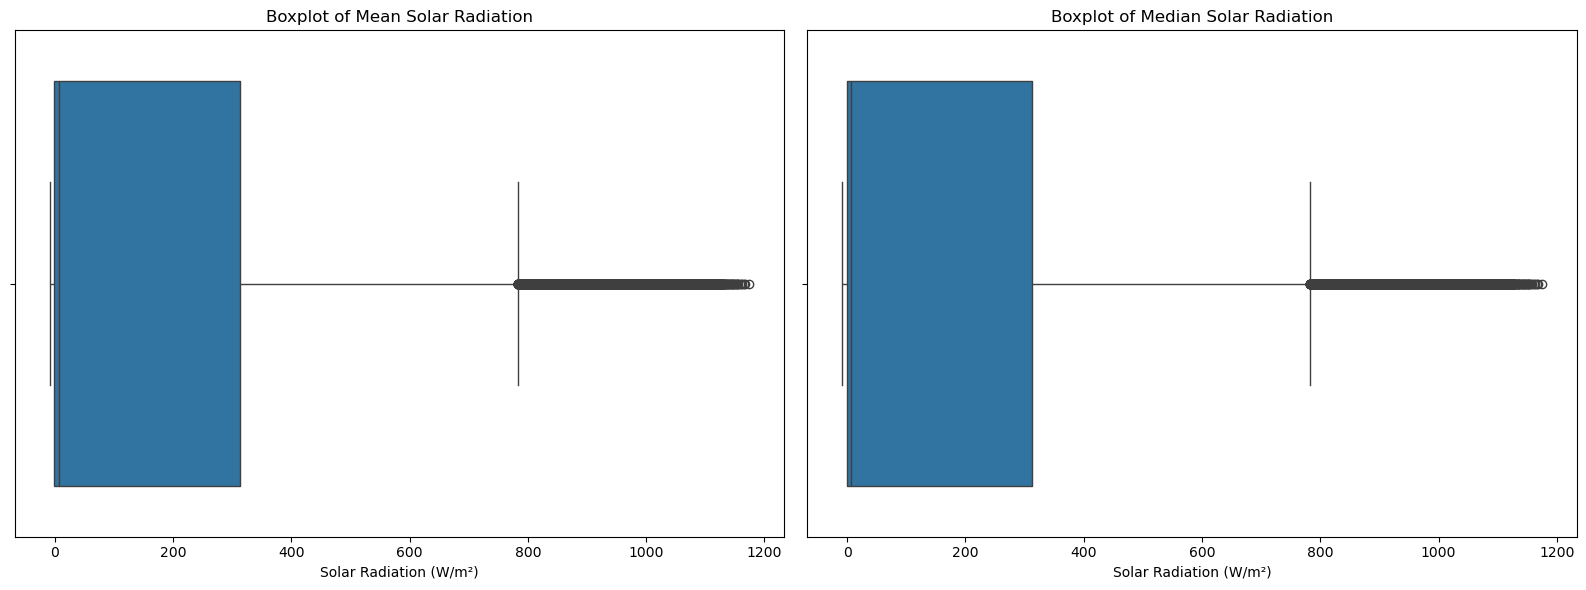

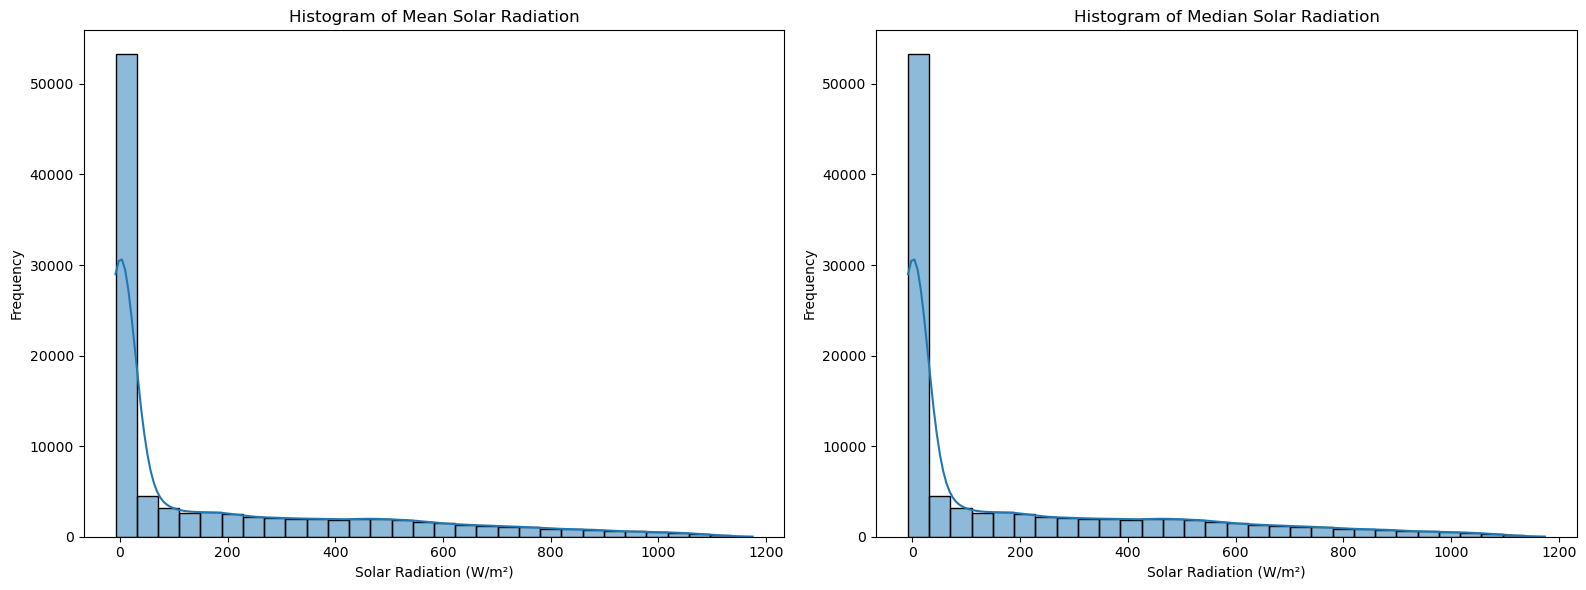

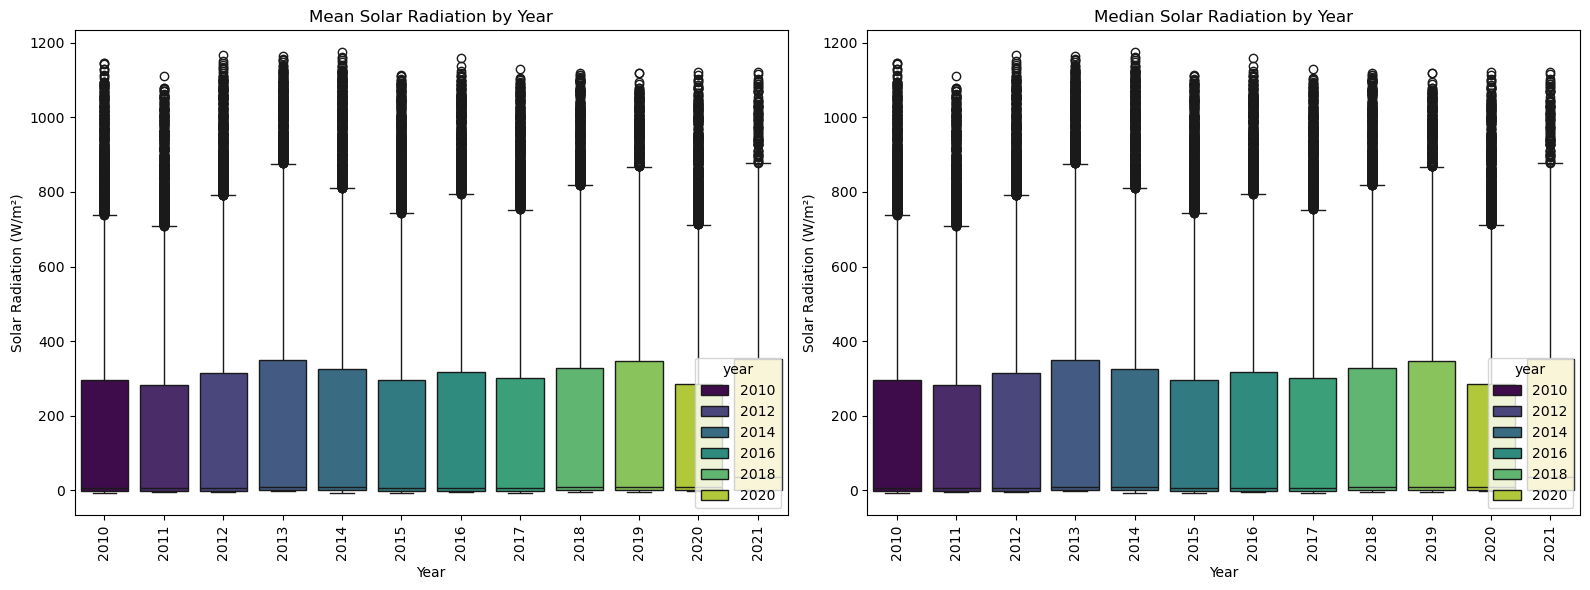

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mean and median solar radiation data
df_solar_radiation = pd.read_csv('../data/NSW/aggregated_solar_radiation_data.csv')

# Check for missing values
print("Missing values:", df_solar_radiation.isnull().sum())

# Convert 'Date' to a datetime object
df_solar_radiation["Date"] = pd.to_datetime(df_solar_radiation["Date"], format='%d/%m/%Y')

# Get summary statistics
summary_statistics = df_solar_radiation.describe()
print(summary_statistics)

# Create subplots for boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean solar radiation
sns.boxplot(data=df_solar_radiation, x="mean_solar_radiation", ax=axes[0])
axes[0].set_title("Boxplot of Mean Solar Radiation")
axes[0].set_xlabel("Solar Radiation (W/m²)")

# Boxplot of median solar radiation
sns.boxplot(data=df_solar_radiation, x="median_solar_radiation", ax=axes[1])
axes[1].set_title("Boxplot of Median Solar Radiation")
axes[1].set_xlabel("Solar Radiation (W/m²)")

plt.tight_layout()
plt.show()

# Create subplots for histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of mean solar radiation
sns.histplot(df_solar_radiation["mean_solar_radiation"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Mean Solar Radiation")
axes[0].set_xlabel("Solar Radiation (W/m²)")
axes[0].set_ylabel("Frequency")

# Histogram of median solar radiation
sns.histplot(df_solar_radiation["median_solar_radiation"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Median Solar Radiation")
axes[1].set_xlabel("Solar Radiation (W/m²)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Extract the year from the 'Date' column
df_solar_radiation["year"] = df_solar_radiation["Date"].dt.year

# Create subplots for mean and median solar radiation by year, side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of mean solar radiation by year
sns.boxplot(data=df_solar_radiation, x="year", y="mean_solar_radiation", ax=axes[0], hue="year", palette="viridis", dodge=False)
axes[0].set_title("Mean Solar Radiation by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Solar Radiation (W/m²)")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot of median solar radiation by year
sns.boxplot(data=df_solar_radiation, x="year", y="median_solar_radiation", ax=axes[1], hue="year", palette="viridis", dodge=False)
axes[1].set_title("Median Solar Radiation by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Solar Radiation (W/m²)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Interpolate Yearly Population forecast between 2023-2071 to Daily Weekly and Monthly

C:\Users\Manoj\AppData\Local\Temp\ipykernel_3260\3365546497.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  population_data['Medium series'].ffill(inplace=True)
C:\Users\Manoj\AppData\Local\Temp\ipykernel_3260\3365546497.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

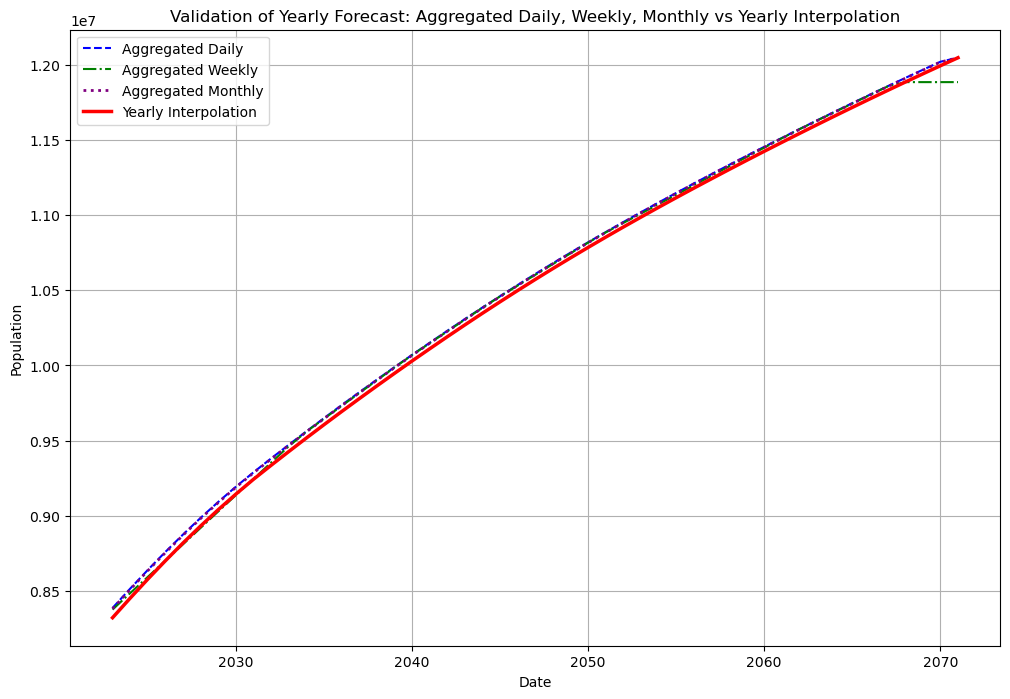

Validation completed. Aggregated yearly means have been compared with yearly interpolation.


In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '../data/NSW/popforecast_nsw.csv'
population_data = pd.read_csv(file_path, skiprows=1)  # Skip the extra header row

# Rename the columns
population_data.columns = ['Year', 'High series', 'Medium series', 'Low series', 
                           'Smallest population', 'Largest population']

# Remove any rows with missing data
population_data = population_data.dropna()

# Convert 'Year' column to integer and 'Medium series' to numeric after removing commas
population_data['Year'] = population_data['Year'].astype(int)
population_data['Medium series'] = pd.to_numeric(population_data['Medium series'].str.replace(',', ''))

# Set the start date for each year as January 1
population_data['Start Date'] = pd.to_datetime(population_data['Year'].astype(str) + '-01-01')

# Set the Start Date as the index for interpolation
population_data.set_index('Start Date', inplace=True)

# Fill missing values before interpolation to avoid gaps
population_data['Medium series'].ffill(inplace=True)
population_data['Medium series'].bfill(inplace=True)

# Linear interpolation for daily, weekly, monthly, and yearly intervals
# Resample and interpolate for each time frequency, using the correct codes

# Daily Interpolation
population_data_daily = population_data['Medium series'].resample('D').interpolate('linear')

# Weekly Interpolation
population_data_weekly = population_data['Medium series'].resample('W').interpolate('linear')

# Monthly Interpolation (using 'MS' for month start to ensure full coverage)
population_data_monthly = population_data['Medium series'].resample('MS').interpolate('linear').ffill().bfill()

# Yearly Interpolation (using 'YS' for year start to ensure full yearly coverage)
population_data_yearly = population_data['Medium series'].resample('YS').interpolate('linear').ffill().bfill()

# Aggregate the daily, weekly, and monthly interpolations to yearly averages
population_data_daily_yearly = population_data_daily.resample('YS').mean()
population_data_weekly_yearly = population_data_weekly.resample('YS').mean()
population_data_monthly_yearly = population_data_monthly.resample('YS').mean()

# Create DataFrames with dates and populations for CSV export
population_data_daily_df = pd.DataFrame({'Date': population_data_daily.index, 'Population': population_data_daily.values})
population_data_weekly_df = pd.DataFrame({'Date': population_data_weekly.index, 'Population': population_data_weekly.values})
population_data_monthly_df = pd.DataFrame({'Date': population_data_monthly.index, 'Population': population_data_monthly.values})
population_data_yearly_df = pd.DataFrame({'Date': population_data_yearly.index, 'Population': population_data_yearly.values})

# Save the forecasts to CSV files
population_data_daily_df.to_csv('../data/Population/population_forecast_linear_daily.csv', index=False)
population_data_weekly_df.to_csv('../data/Population/population_forecast_linear_weekly.csv', index=False)
population_data_monthly_df.to_csv('../data/Population/population_forecast_linear_monthly.csv', index=False)
population_data_yearly_df.to_csv('../data/Population/population_forecast_linear_yearly.csv', index=False)

# Create DataFrames for aggregated yearly means
aggregated_yearly_df = pd.DataFrame({
    'Date': population_data_yearly.index,
    'Aggregated Daily': population_data_daily_yearly.values,
    'Aggregated Weekly': population_data_weekly_yearly.values,
    'Aggregated Monthly': population_data_monthly_yearly.values,
    'Yearly Interpolation': population_data_yearly.values
})

# Save the aggregated yearly data to CSV files
aggregated_yearly_df.to_csv('../data/Population/population_aggregated_yearly.csv', index=False)

# Plot the comparison between aggregated values and yearly interpolation
plt.figure(figsize=(12, 8))

# Plot the aggregated daily, weekly, and monthly against the yearly interpolation
plt.plot(aggregated_yearly_df['Date'], aggregated_yearly_df['Aggregated Daily'], label='Aggregated Daily', linestyle='--', color='blue', linewidth=1.5)
plt.plot(aggregated_yearly_df['Date'], aggregated_yearly_df['Aggregated Weekly'], label='Aggregated Weekly', linestyle='-.', color='green', linewidth=1.5)
plt.plot(aggregated_yearly_df['Date'], aggregated_yearly_df['Aggregated Monthly'], label='Aggregated Monthly', linestyle=':', color='purple', linewidth=2)
plt.plot(aggregated_yearly_df['Date'], aggregated_yearly_df['Yearly Interpolation'], label='Yearly Interpolation', linestyle='-', color='red', linewidth=2.5)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Validation of Yearly Forecast: Aggregated Daily, Weekly, Monthly vs Yearly Interpolation')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.show()

# Display a success message
print('Validation completed. Aggregated yearly means have been compared with yearly interpolation.')


Model Features and Population Forecast merge

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

# Load the CSV files
population_daily_path = '../data/Population/population_forecast_linear_daily.csv'
population_weekly_path = '../data/Population/population_forecast_linear_weekly.csv'
population_monthly_path = '../data/Population/population_forecast_linear_monthly.csv'
population_yearly_path = '../data/Population/population_forecast_linear_yearly.csv'
data_for_ml_path = '../data/NSW/data_for_ml.csv'

# Load each dataset
population_daily_df = pd.read_csv(population_daily_path)
population_weekly_df = pd.read_csv(population_weekly_path)
population_monthly_df = pd.read_csv(population_monthly_path)
population_yearly_df = pd.read_csv(population_yearly_path)
data_for_ml_df = pd.read_csv(data_for_ml_path)

# Convert the 'Date' columns to datetime for consistency
population_daily_df['Date'] = pd.to_datetime(population_daily_df['Date'], errors='coerce') 
population_weekly_df['Date'] = pd.to_datetime(population_weekly_df['Date'], errors='coerce')
population_monthly_df['Date'] = pd.to_datetime(population_monthly_df['Date'], errors='coerce')
population_yearly_df['Date'] = pd.to_datetime(population_yearly_df['Date'], errors='coerce')
data_for_ml_df['Date'] = pd.to_datetime(data_for_ml_df['Date'], errors='coerce')

# Drop the 'Population' and 'TOTALDEMAND' columns from data_for_ml_df
data_for_ml_df = data_for_ml_df.drop(columns=['Population', 'TOTALDEMAND'])

# Filter out incomplete years from the historical data
data_for_ml_df['Year'] = data_for_ml_df['Date'].dt.year
year_counts = data_for_ml_df['Year'].value_counts()
complete_years = year_counts[year_counts == 365].index
data_for_ml_df = data_for_ml_df[data_for_ml_df['Year'].isin(complete_years)]
data_for_ml_df = data_for_ml_df.drop(columns=['Year'])

# Get the forecast start and end dates from the daily population data
forecast_start_date = population_daily_df['Date'].min()
forecast_end_date = population_daily_df['Date'].max()

# Generate date ranges for daily, weekly, monthly, and yearly forecasts within the forecast period
forecast_dates_daily = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast_dates_weekly = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')
forecast_dates_monthly = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='ME')  # Month-end
forecast_dates_yearly = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='YE')   # Year-end

# Helper function to perform time series fill using complete yearly sets
def time_series_fill(feature_series, forecast_dates):
    """
    Repeats the yearly pattern of the feature based on available
    historical data for complete years and extends it to the forecast period.
    """
    # Convert to daily frequency and remove NaN values
    feature_series = feature_series.set_index('Date').asfreq('D').dropna()

    # Check the length of the feature series and the forecast dates
    feature_length = len(feature_series)
    forecast_length = len(forecast_dates)
    
    # Repeat the historical data enough times to cover the forecast period
    repeated_pattern = np.resize(feature_series.values, forecast_length)
    
    return repeated_pattern

# Prepare the forecast data for each frequency using time series fill
extrapolated_daily = pd.DataFrame(forecast_dates_daily, columns=['Date'])
extrapolated_weekly = pd.DataFrame(forecast_dates_weekly, columns=['Date'])
extrapolated_monthly = pd.DataFrame(forecast_dates_monthly, columns=['Date'])
extrapolated_yearly = pd.DataFrame(forecast_dates_yearly, columns=['Date'])

# List of features to extrapolate (exclude 'Date')
features_to_extrapolate = data_for_ml_df.columns.difference(['Date'])

# Apply time series fill to all features
for feature in features_to_extrapolate:
    feature_series = data_for_ml_df[['Date', feature]].copy()
    
    # Apply time series fill for each frequency
    extrapolated_daily[feature] = time_series_fill(feature_series, forecast_dates_daily)
    extrapolated_weekly[feature] = time_series_fill(feature_series, forecast_dates_weekly)
    extrapolated_monthly[feature] = time_series_fill(feature_series, forecast_dates_monthly)
    extrapolated_yearly[feature] = time_series_fill(feature_series, forecast_dates_yearly)

# Combine the population forecasts with extrapolated features (without Population and TOTALDEMAND columns)
population_daily_combined = pd.concat([population_daily_df.set_index('Date'), extrapolated_daily.set_index('Date')], axis=1).reset_index()
population_weekly_combined = pd.concat([population_weekly_df.set_index('Date'), extrapolated_weekly.set_index('Date')], axis=1).reset_index()
population_monthly_combined = pd.concat([population_monthly_df.set_index('Date'), extrapolated_monthly.set_index('Date')], axis=1).reset_index()
population_yearly_combined = pd.concat([population_yearly_df.set_index('Date'), extrapolated_yearly.set_index('Date')], axis=1).reset_index()

# Rename 'Population_Pred' to 'Population' after merging
population_daily_combined.rename(columns={'Population_Pred': 'Population'}, inplace=True)
population_weekly_combined.rename(columns={'Population_Pred': 'Population'}, inplace=True)
population_monthly_combined.rename(columns={'Population_Pred': 'Population'}, inplace=True)
population_yearly_combined.rename(columns={'Population_Pred': 'Population'}, inplace=True)

# Ensure 'Population' column is preserved and missing values are handled
population_daily_combined['Population'].fillna(method='ffill', inplace=True)
population_weekly_combined['Population'].fillna(method='ffill', inplace=True)
population_monthly_combined['Population'].fillna(method='ffill', inplace=True)
population_yearly_combined['Population'].fillna(method='ffill', inplace=True)

# Save the combined forecasts with time series filled features to CSV files
population_daily_combined.to_csv('../data/Population/population_forecast_with_features_daily.csv', index=False)
population_weekly_combined.to_csv('../data/Population/population_forecast_with_features_weekly.csv', index=False)
population_monthly_combined.to_csv('../data/Population/population_forecast_with_features_monthly.csv', index=False)
population_yearly_combined.to_csv('../data/Population/population_forecast_with_features_yearly.csv', index=False)

# Display a success message
print('Forecast data with time series fill saved successfully for daily, weekly, monthly, and yearly intervals.')


Forecast data with time series fill saved successfully for daily, weekly, monthly, and yearly intervals.


C:\Users\Manoj\AppData\Local\Temp\ipykernel_3260\2250365240.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  population_daily_combined['Population'].fillna(method='ffill', inplace=True)
C:\Users\Manoj\AppData\Local\Temp\ipykernel_3260\2250365240.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  population_daily_combined['Population'].fillna(method='ffill', inplace=True)
C:\Users\Manoj\AppData\Local\Temp\ipykernel_3260\2250365240.py: